# **A. Root finding for scalar nonlinear equations**

In [ ]:
# import all the packages here
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
# Function that finds the fixed point of a certain function phi
#
# Possible usages:
# x, success, errEst, xHist = fpIterator(phi, x0, tol, maxit)
# x, success, errEst, xHist = fpIterator(phi, x0, tol)
# x, success, errEst, xHist = fpIterator(phi, x0)
# x, success, errEst, _ = fpIterator(phi, x0, tol, maxit)
# x, success, errEst, _ = fpIterator(phi, x0, tol)
# x, success, errEst, _ = fpIterator(phi, x0)
#
# INPUT:
# phi           iteration function (function handle)
# x0            initial guess for the root
# tol           desired tolerance to stop iterations
# maxit         maximum number of iterations
#
# OUTPUT:
# x             solution at the final iteration
# success       true means converged according to error estimator
# errEst        array with error estimate per iterations
# xHist         array with solutions per iterations

def fpIterator(phi, x0, tol=1e-6, maxit=20):

    # initialize your output variables here (x, errEst, xHist)

    # loop (at most maxit iterations) to find the root; possible strategies
    #
    # inside the loop you will have to compute the new guess for the root and
    # check for convergence, i.e. check if the error at the current iteration
    # reached the tolerance
    # if yes >>> break
    # if no >>> update the previous iteration x and iterate again

    # finally, update the success variable

  try:
    errEst = []
    xHist = []
    error = 1
    iter = 0

    while error > tol and iter < maxit:
      x = phi(x0)
      error = np.abs(x0-x)
      errEst.append(error)
      x0 = x
      xHist.append(x0)
      iter += 1

      if min(errEst) < tol:
        success = True
      else:
        success = False

    return x, success, xHist, errEst

  except ZeroDivisionError:
    success = False
    return x0, success, xHist, errEst


In [ ]:
## Discussion question A.1(a)

# after defining phi, x0, tol and maxit as written in the pdf, you set up
# your output as follows
def phi(x):
    return -1 / (x ** 2 - 2)

x0 = [i/4 for i in range(-8, 9)]  # Generate x values from -2 to 2 in steps of 0.25

print(f'FP iteration results:\n')
for i in range(len(x0)):
  print(f'{x0[i]}     {fpIterator(phi, x0[i])[1]}')


FP iteration results:

-2.0     True
-1.75     False
-1.5     True
-1.25     True
-1.0     True
-0.75     True
-0.5     True
-0.25     True
0.0     True
0.25     True
0.5     True
0.75     True
1.0     True
1.25     True
1.5     True
1.75     False
2.0     True


In [ ]:
# Function that finds the solution of an equation or system of equations
# using the Newton method
#
# Possible usages:
# x, success, errEst, xHist = newton(phi, x0, tol, maxit)
# x, success, errEst, xHist = newton(phi, x0, tol)
# x, success, errEst, xHist = newton(phi, x0)
# x, success, errEst, _ = newton(phi, x0, tol, maxit)
# x, success, errEst, _ = newton(phi, x0, tol)
# x, success, errEst, _ = newton(phi, x0)
#
# INPUT:
# f             function handling (may be vector valued)
# df            derivative of f (or function returning Jacobian matrix)
# x0            initial guess
# tol           desired toleraance to stop iterations
# maxit         maximum number of iterations
#
# OUTPUT:
# x             solution at the final iteration
# success       true means converged according to error estimator
# errEst        array with error estimate per iterations
# xHist         array with solutions per iterations
#

def newton(f, df, x0, tol=1e-8, maxit=20):
  'Uses the Newton Method to compute the root of a function'
  try:
    e = []
    x_p = []
    iter = 0
    error = 1

    while error > tol and iter < maxit:
      x = x0 - (f(x0)/df(x0))
      error = np.abs(x0 - x)
      e.append(error)
      x0 = x
      x_p.append(x0)
      iter += 1

      if min(e) < tol:
        boolean = True
      else:
        boolean = False
    return x_p[-1], boolean, x_p, e

  except ZeroDivisionError:
    boolean = False
    return boolean, x_p, e


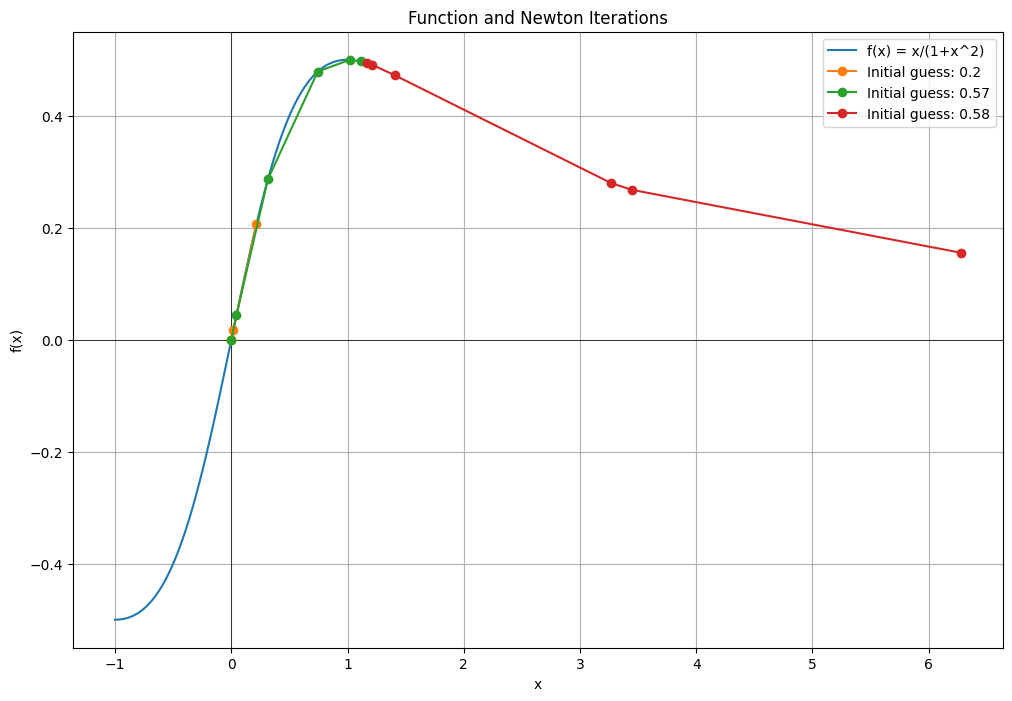

In [ ]:
# Define the function and its derivative
def f(x):
    return x / (1 + x**2)

def df(x):
    return (1 - x**2) / ((1 + x**2)**2)

# Initial guesses
initial_guesses = [0.2, 0.57, 0.58]
max_iterations = 6

# Plot the function
x = np.linspace(-1, 1, 1000)
plt.figure(figsize=(12, 8))
plt.plot(x, f(x), label='f(x) = x/(1+x^2)')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid()
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Function and Newton Iterations')
plt.legend()

# Apply Newton's method for each initial guess
for guess in initial_guesses:
    _, _, _, x_hist = newton(f, df, guess, tol=1e-8, maxit=max_iterations)
    plt.plot(x_hist, f(np.array(x_hist)), marker='o', linestyle='-', label=f'Initial guess: {guess}')

plt.legend()
plt.show()


# **B. Root finding for systems of nonlinear equations**

In [ ]:
## Discussion question B.1

# - set the correct inputs and find the root
# - compute the order
# - compute the factor
# - print out in a readable way, you can use the following code or something similar
# Define the function and its derivative
def g(x):
    return x**3 - 2*x + 1

def dg(x):
    return 3*x**2 - 2

# Function to compute convergence order
def p(e):
    return (np.log(e[-1]/e[-2])) / (np.log(e[-2]/e[-3]))

# Function to compute asymptotic convergence factor
def asymptotic(e, p):
    return e[-1] / (e[-2]**p)

# Initial guess and true root
x0 = 0.25
tol = 1e-12
maxit = 20
root_x = (-1 + np.sqrt(5)) / 2

# Define phi for fixed-point iteration
def phi(x):
    return x - g(x) / dg(x)

# Apply Newton's method
_, _, xHist_newton, errEst_newton = newton(g, dg, x0, tol, maxit)

# Calculate error
error_newton = [np.abs(x - root_x) for x in xHist_newton]

# Compute convergence order and asymptotic convergence factor
convergence_order_newton = p(errEst_newton)
asymptotic_factor_newton = asymptotic(errEst_newton, 2)

# Print the results in a readable way
print('\n\nConvergence order results: \n')
print('    Method                            Order        Factor')
print('--------------------------------------------------------')
print(f'Newton Method                        {convergence_order_newton:.6f}     {asymptotic_factor_newton:.6e}')




Convergence order results: 

    Method                            Order        Factor
--------------------------------------------------------
Newton Method                        2.000237     2.166369e+00


In [ ]:
# Function to compute the 2-norm of the update
def fpIterator_non(phi, x0, tol=1e-12, maxit=20):
    try:
        xHist = []
        errEst = []
        iter = 0
        error = 1
        x0 = np.array(x0, dtype=float)

        while error > tol and iter < maxit:
            x = phi(x0)
            error = np.linalg.norm(x - x0)
            errEst.append(error)
            x0 = x
            xHist.append(x0)
            iter += 1

        success = error < tol
        return x, success, xHist, errEst

    except ZeroDivisionError:
        success = False
        return success, xHist, errEst

# Newton method for systems using the adjusted fpIterator
def newton_non(f, J, x0, tol=1e-6, maxit=100):
    def phi(x):
        return x - np.linalg.solve(J(x), f(x))

    return fpIterator_non(phi, x0, tol, maxit)

# Define the linear system
A = np.array([[2, -1], [-1, 2]])
b = np.array([1, 0])

def F(x):
    return np.dot(A, x) - b

def JF(x):
    return A  # For a linear system, the Jacobian is constant and equals A

# Initial guess
x0 = [0, 0]

# Apply Newton's method to the system
solution_newton, success_newton, xHist_newton, errEst_newton = newton_non(F, JF, x0)

# Print the results for Newton's method
print('\nNewton Method Results:')
print('Solution:', solution_newton)
print('Success:', success_newton)
print('Iteration history:', xHist_newton)
print('Error estimates:', errEst_newton)

# Conditions to ensure correct implementation
print('\nConditions for correct implementation:')
print('1. The Jacobian matrix JF(x) should be non-singular at the solution.')
print('2. The function F(x) should be continuously differentiable.')
print('3. The initial guess should be close enough to the true solution for Newton\'s method to converge.')

# Verify the Jacobian matrix at the solution
jacobian_at_solution = JF(solution_newton)
print('Jacobian matrix at the solution:', jacobian_at_solution)
print('Determinant of the Jacobian matrix at the solution:', np.linalg.det(jacobian_at_solution))




Newton Method Results:
Solution: [0.66666667 0.33333333]
Success: True
Iteration history: [array([0.66666667, 0.33333333]), array([0.66666667, 0.33333333])]
Error estimates: [0.7453559924999299, 0.0]

Conditions for correct implementation:
1. The Jacobian matrix JF(x) should be non-singular at the solution.
2. The function F(x) should be continuously differentiable.
3. The initial guess should be close enough to the true solution for Newton's method to converge.
Jacobian matrix at the solution: [[ 2 -1]
 [-1  2]]
Determinant of the Jacobian matrix at the solution: 2.9999999999999996


In [ ]:
## THIS FUNCTION IS GIVEN TO THE STUDENTS

# plotResidual_partB
#
# INPUT
# p         parameter which shifts the parabola

def plotResidual_partB(p):

    plt.figure(figsize=(18,10))

    nHat = np.array([0.5, 1])
    nHat = nHat/np.linalg.norm(nHat)
    tHat = np.array([nHat[1], -nHat[0]])
    xHat = np.array([[2],[1]])/np.sqrt(2)

    # For plotting the curves we parametrize them using angle (F1) and tangential co-ordinate (F2)
    par1 = lambda theta, p:  np.array([[2*np.cos(theta)], [np.sin(theta)]])
    par2 = lambda t, p: np.outer((tHat), t) + np.outer( (nHat), (np.matmul(nHat,xHat) + (p+0.5*np.power(t-np.matmul(tHat,xHat), 2)) ) )
    parametrizations = [par1, par2]

    paramRanges = [[0, 2*np.pi], [-1, 2.5]]
    paramStyles = ['r-','r--']

    N = 100
    xLim = [-5, 5]
    yLim = [-2.5, 3.5]

    # Plot contours of the error
    xVals = np.linspace(xLim[0], xLim[1], N)
    yVals = np.linspace(yLim[0], yLim[1], N)
    X, Y = np.array( np.meshgrid(xVals, yVals, indexing='xy') )

    s1 = lambda x,y: np.power( np.power(x/2, 2) + np.power(y, 2) - 1, 2)
    s2 = lambda x,y: np.power( nHat[0]*x + nHat[1]*y -np.matmul(nHat, xHat) - (p+0.5*np.power( (tHat[0]*x+tHat[1]*y-np.matmul(tHat, xHat)),2 )) ,2 )
    errFun = lambda x, y: np.sqrt(s1(x,y) + s2(x,y))
    Z = np.log10(errFun(X, Y))

    levels = np.arange(-2, 1, 0.25)
    plt.contourf( xVals, yVals, Z, levels )

    # Add parametrized curves
    i = 0
    for pdx in parametrizations:
        params = np.linspace(paramRanges[i][0], paramRanges[i][1], N)
        xyCoords = pdx(params, p)

        if i == 1:
            x = xyCoords[0, :]
            y = xyCoords[1, :]
        else:
            x = xyCoords[0, :][0]
            y = xyCoords[1, :][0]

        plt.plot(x, y, paramStyles[i])

        i += 1

    plt.colorbar()
    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    plt.title('Colormap corresponds to $\log_{{10}}\sqrt{{F_1^2 + F_2^2}}$, where $p = %4.2f $' % p, fontsize=16)


Testing for p = -0.5
Initial guess: [0.51978637 3.39038835]
Solution: [0.5955401  0.95463763]
Convergence: True
Iteration history: [array([0.29617957, 1.84127913]), array([0.44495279, 1.18025192]), array([0.56813615, 0.98118606]), array([0.59477376, 0.9552034 ]), array([0.5955396 , 0.95463795]), array([0.5955401 , 0.95463763])]
Error estimates: [1.5651643372682682, 0.6775621284227148, 0.23409689731992533, 0.03721103518660448, 0.0009519644423843709, 5.997605107533167e-07]
Convergence order: 2.0103896226209836


Initial guess: [4.09749514 1.60153397]
Solution: [1.96985514 0.17296728]
Convergence: True
Iteration history: [array([3.0040465, 0.501939 ]), array([2.24319513, 0.13814962]), array([1.99200076, 0.15506091]), array([1.9703672 , 0.17275198]), array([1.96985529, 0.17296718]), array([1.96985514, 0.17296728])]
Error estimates: [1.550722102173984, 0.8433489880130344, 0.2517629867588084, 0.02794611214190231, 0.0005553039292476407, 1.7903358756662412e-07]
Convergence order: 2.05171901146

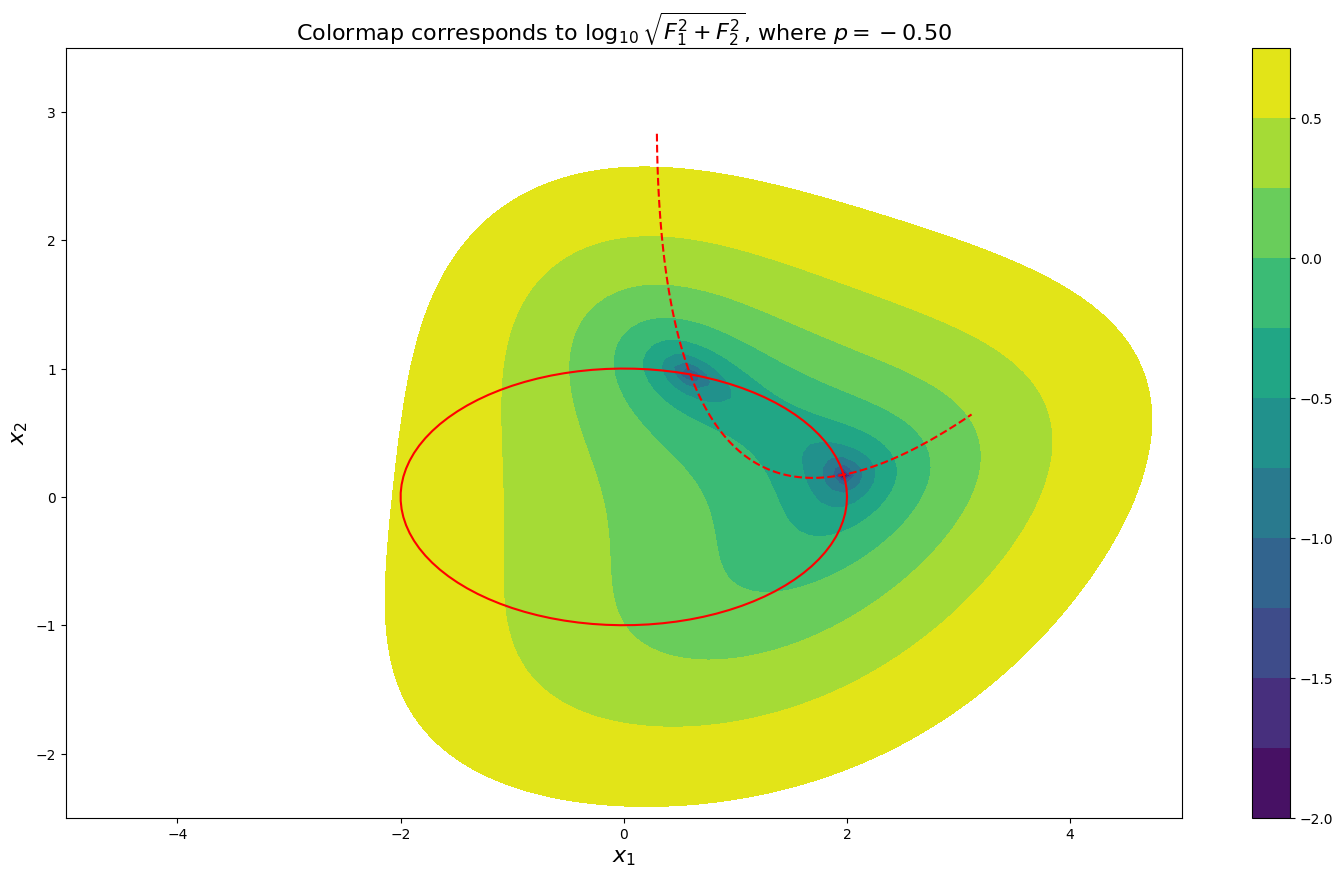

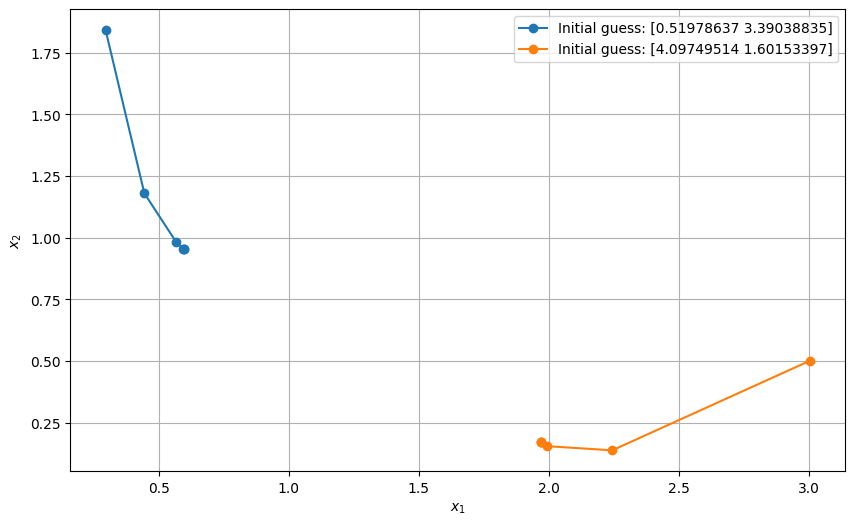

Testing for p = 0
Initial guess: [0.51978637 3.39038835]
Solution: [1.41421289 0.70710712]
Convergence: True
Iteration history: [array([0.51978637, 1.83270874]), array([0.80192821, 1.15074207]), array([1.07089608, 0.89315786]), array([1.23853222, 0.79564094]), array([1.32617368, 0.75114322]), array([1.37018878, 0.72911937]), array([1.39220111, 0.71811301]), array([1.40320734, 0.71260989]), array([1.40871045, 0.70985834]), array([1.41146201, 0.70848256]), array([1.41283778, 0.70779467]), array([1.41352567, 0.70745073]), array([1.41386962, 0.70727875]), array([1.41404159, 0.70719277]), array([1.41412758, 0.70714977]), array([1.41417057, 0.70712828]), array([1.41419207, 0.70711753]), array([1.41420281, 0.70711216]), array([1.41420819, 0.70710947]), array([1.41421088, 0.70710812]), array([1.41421222, 0.70710745]), array([1.41421289, 0.70710712])]
Error estimates: [1.557679616131079, 0.738026115514947, 0.3724155523126339, 0.1939366546667854, 0.09829075458693734, 0.04921766548741982, 0.02461

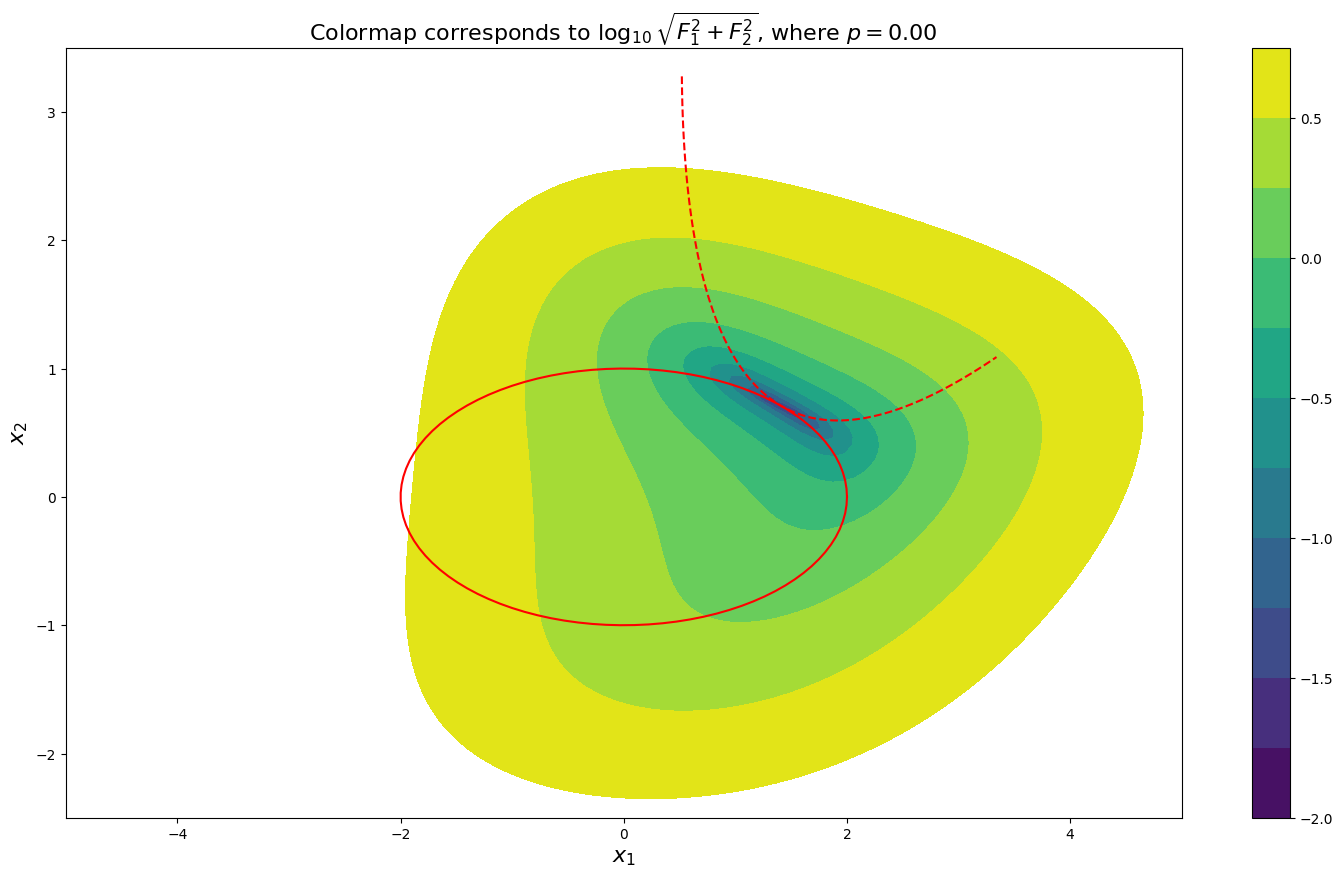

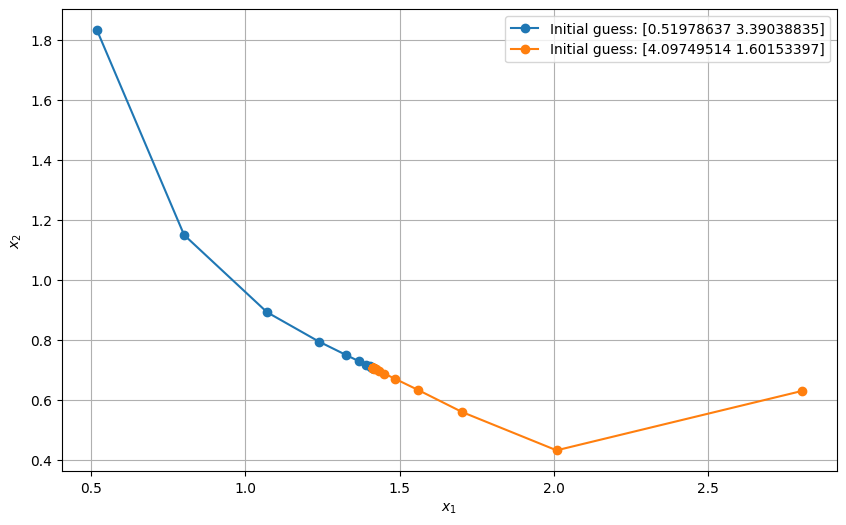

Testing for p = 0.5
Initial guess: [0.51978637 3.39038835]
Solution: [0.47817455 1.30321409]
Convergence: False
Iteration history: [array([0.74339317, 1.82413835]), array([1.230966  , 1.09862643]), array([2.12940872, 0.580354  ]), array([1.32996283, 0.90840152]), array([2.9989589 , 0.15034193]), array([2.06525198, 0.57947378]), array([1.26878444, 0.94217077]), array([2.55484848, 0.35522395]), array([1.75953279, 0.71831713]), array([0.46499954, 1.30922497]), array([1.26284853, 0.94503016]), array([2.52410807, 0.36929802]), array([1.7357435 , 0.72916629]), array([0.3266818 , 1.37236661]), array([1.16194663, 0.99108975]), array([2.1494353 , 0.54032661]), array([1.38068763, 0.89124012]), array([ 3.5774119 , -0.11150792]), array([2.40740667, 0.42256933]), array([1.64025697, 0.7727534 ]), array([-0.71274438,  1.84683789]), array([0.5297946 , 1.27965086]), array([1.31317938, 0.92205589]), array([2.8320636 , 0.22872438]), array([1.95611518, 0.62857227]), array([1.08600955, 1.02575307]), array(

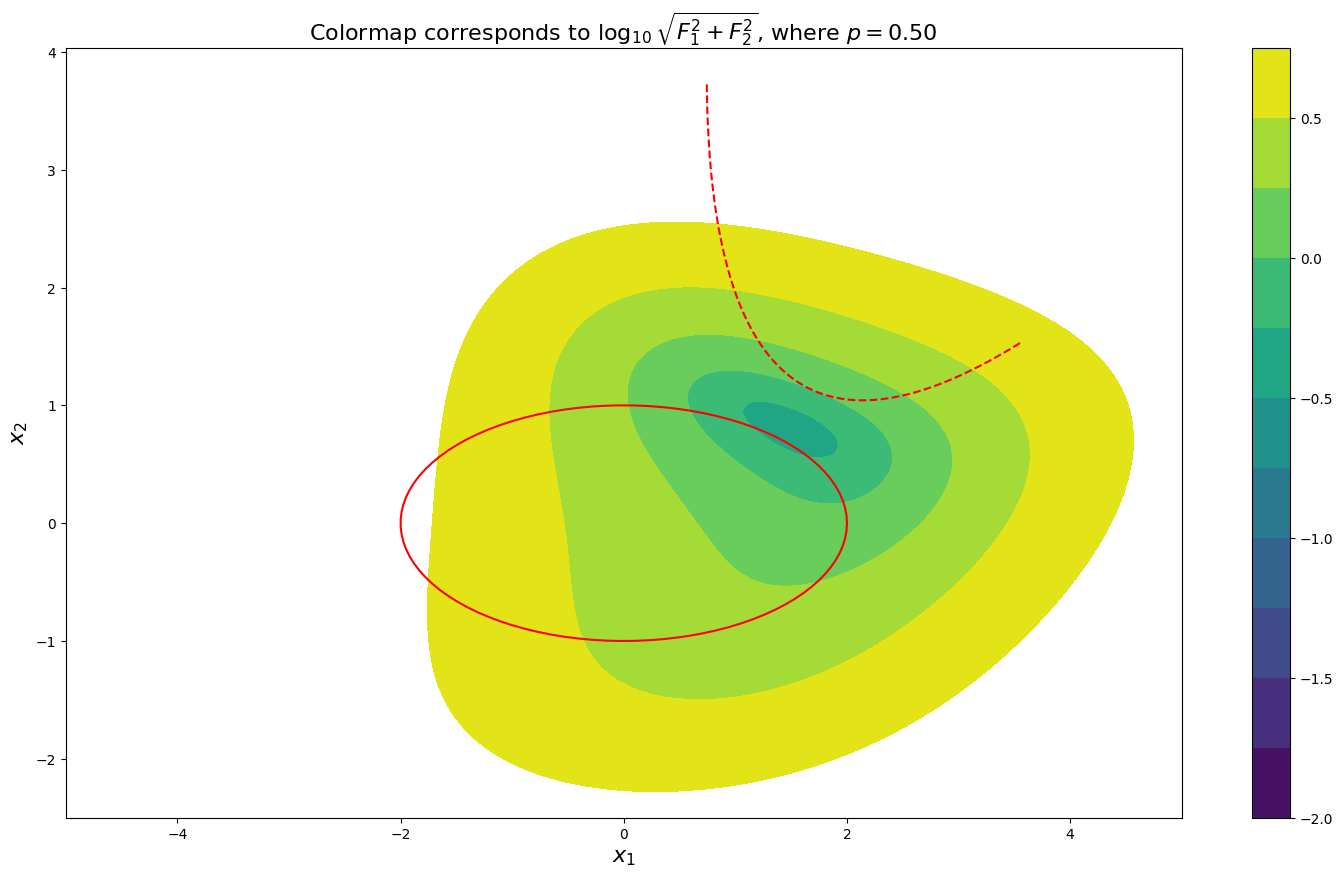

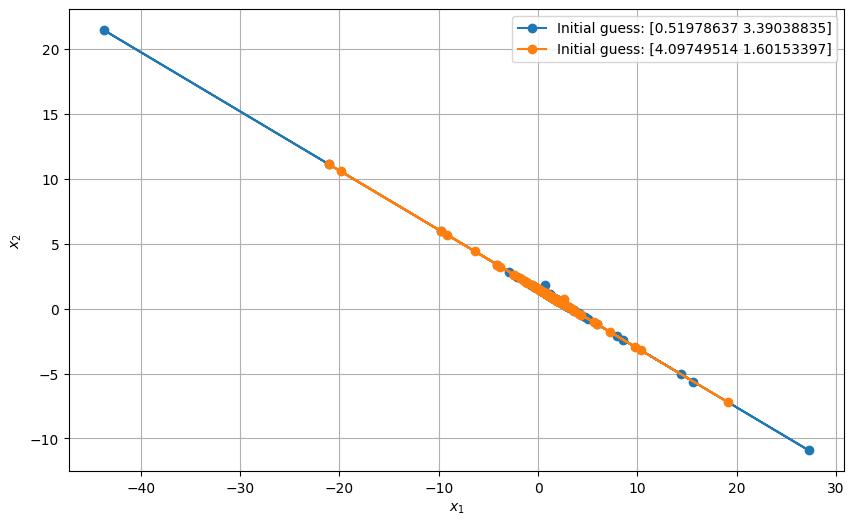

In [ ]:
## Discussion question B.3

# set up the components of F as described in equation (7) and the
# jacobian components; you also need to define z, n and t

# set up the initial guesses as defined in the pdf

# print out the results as follows (or in a similar and readable way)

# for each value of p, you have to
# - print out all the information that you set up before
# - use plotResidual_partB to plot the sequence {x^(k)}

# Define the functions for F(x) with different p values
def F(x, p):
    z = np.array([2 / np.sqrt(2), 1 / np.sqrt(2)])
    n = np.array([z[0] / 2, z[1] * 2]) / np.linalg.norm(np.array([z[0] / 2, z[1] * 2]))
    t = np.array([n[1], -n[0]])
    y1 = (x[0] / 2) ** 2 + (x[1] ** 2) - 1
    y2 = np.dot(n, (x - z)) - p - (0.5 * (np.dot(t, (x - z)) ** 2))
    return np.array([y1, y2])

def JF(x):
    z = np.array([2 / np.sqrt(2), 1 / np.sqrt(2)])
    n = np.array([z[0] / 2, z[1] * 2]) / np.linalg.norm(np.array([z[0] / 2, z[1] * 2]))
    t = np.array([n[1], -n[0]])
    JF1 = np.array([x[0] / 2, 2 * x[1]])
    JF2 = n - t * (np.dot(t, x - z))
    return np.array([JF1, JF2])

# Newton's method for systems
def newton_non(F, JF, x0, p, tol=1e-6, maxit=100):
    e = []
    x_p = []
    iter = 0
    error = 1
    x0 = np.array(x0, dtype=float)

    while error > tol and iter < maxit:
        delta_x = np.linalg.solve(JF(x0), -F(x0, p))
        x = x0 + delta_x
        error = np.linalg.norm(delta_x)
        e.append(error)
        x0 = x
        x_p.append(x0)
        iter += 1

    success = error < tol
    return x, success, x_p, e

# Initial guesses based on z, n, and t
z = np.array([2, 1]) / np.sqrt(2)
n = np.array([0.5, 1]) / np.linalg.norm([0.5, 1])
t = np.array([n[1], -n[0]])
x01 = z + 2 * (n - t)
x02 = z + 2 * (n + t)

# Define values for p
p_values = [-0.5, 0, 0.5]

# Function to compute convergence order
def convergence_order(errors):
    return (np.log(errors[-1] / errors[-2])) / (np.log(errors[-2] / errors[-3]))

# Plot sequences of x(k) for each initial guess
def plot_sequences(x_histories, labels):
    plt.figure(figsize=(10, 6))
    for i, x_hist in enumerate(x_histories):
        x_hist = np.array(x_hist)
        plt.plot(x_hist[:, 0], x_hist[:, 1], marker='o', label=labels[i])
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.legend()
    plt.grid()
    plt.show()

# Test and plot the sequences for different p values
for p in p_values:
    print(f"Testing for p = {p}")
    plotResidual_partB(p)

    x_histories = []
    labels = []

    for x0 in [x01, x02]:
        solution, success, x_hist, errors = newton_non(F, JF, x0, p)
        x_histories.append(x_hist)
        labels.append(f"Initial guess: {x0}")

        print(f"Initial guess: {x0}")
        print(f"Solution: {solution}")
        print(f"Convergence: {success}")
        print(f"Iteration history: {x_hist}")
        print(f"Error estimates: {errors}")
        if len(errors) >= 3:
            print(f"Convergence order: {convergence_order(errors)}")
        else:
            print("Not enough iterations to compute convergence order")
        print("\n")

    plot_sequences(x_histories, labels)


# **C. Iterative solution to system of linear equations**

In [ ]:
# INPUT
# A             NxN matrix
# b             Nx1 right-hand side
# method        boolean, if True >> static, if False >> dynamic
# x0            (optional) initial guess
# tol           (optional) desired tolerance
# maxIt         (optional) maximum number of iterations
# alpha0        (optional) static parameter,
#               if not provided (alpha0=10) >>> dynamic Richardson
#
# OUTPUT
# x             approximate solution (last computed)
# success       true means converged according to error estimator
# errEst        error estimate per iteration = norm(x(k+1)-x(k))
# xHist         (optional) array with intermediate solutions

def richardson(A, b, method, x0, tol=1e-6, maxit=20, alpha0=10.):
    'Uses the Richardson Method to solve linear systems'
    #def richardson(A, b, method, x0=None, tol=1e-6, maxit=None, alpha0=10.):
    if x0 is None:
        x0 = np.zeros_like(b)  # Default initial guess is the zero vector

    if maxit is None:
        maxit = A.shape[0]  # Default maximum iterations is the dimension of the linear system

    # Define the Richardson iteration function
    def G(x, alpha):
        return x - alpha * (b - A @ x)

    # Use the fpIterator function with the appropriate G function based on the method
    success, x, errEst, xHist = fpIterator(G, x0, tol, maxit)

    return x, success, errEst, xHist

Matrix A is symmetric and positive definite (SPD)
0.44 and [0.65808846 0.32464059]
0.45 and [0.65916172 0.32561393]
0.46 and [0.66016273 0.32644801]
0.47 and [0.6611177  0.32713519]
0.48 and [0.66205844 0.32766085]
0.49 and [0.66302399 0.32800191]
0.5 and [0.6640625 0.328125 ]
0.51 and [0.6652334  0.32798437]


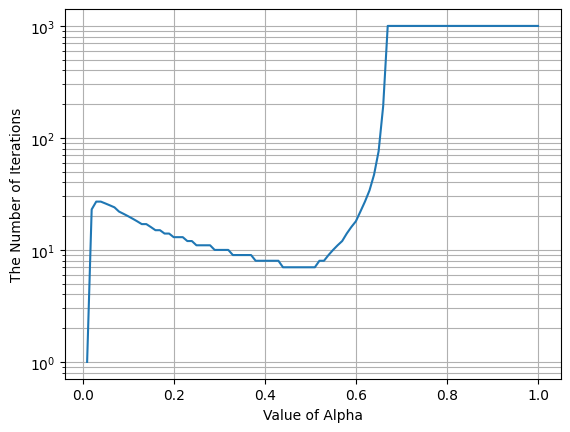

0.46 and [0.66016273 0.32644801]
0.47 and [0.6611177  0.32713519]
0.48 and [0.66205844 0.32766085]
0.49 and [0.66302399 0.32800191]
0.5 and [0.6640625 0.328125 ]
0.51 and [0.6652334  0.32798437]
0.52 and [0.66660982 0.3275195 ]
0.53 and [0.6682813  0.32665247]
0.54 and [0.67035694 0.32528489]


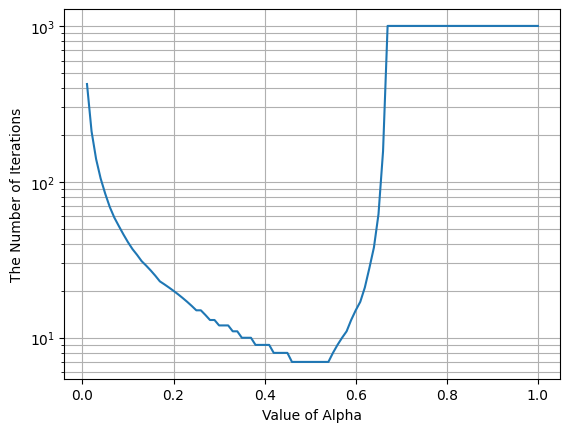

In [ ]:

def richardson1(A, b, x0, alpha0, tol = 10e-3, maxit= 1000):
  '''The richardson1 function uses the Richardson iteration method to solve a linear system of equations
  and returns the final solution, convergence status, and lists of intermediate solutions and error estimates.'''
  try:
    xHist = []
    errEst = []
    iter = 0
    e = x0 - np.array([2/3, 1/3])
    error = np.linalg.norm(e)

    while error > tol and iter < maxit:
      rk = b- A @ x0
      x = x0 + alpha0 * rk
      alpha = alpha0
      Ba = np.array([[1,0],[0,1]]) - alpha * A
      e_new = np.matmul(Ba, e)
      error = np.linalg.norm(e_new)
      e = e_new
      alpha0 = alpha
      errEst.append(error)
      x0 = x
      xHist.append(x0)
      iter += 1

      if min(errEst) < tol:
        success = True
      else:
        success = False
    return x0, success, xHist, errEst

  except ZeroDivisionError:
    success = False
    return success, xHist, errEst

def richardson(A, b, x0, alpha0, tol = 10e-3, maxit= 1000):
  '''The richardson function uses the Richardson iteration method to solve a linear system of equations.
   It returns the final solution, convergence status, and lists of intermediate solutions and error estimates.'''
  try:
    xHist = []
    errEst = []
    iter = 0
    error = 1

    while error > tol and iter < maxit:
      rk = b- A @ x0
      x = x0 + alpha0 * rk
      alpha = alpha0
      Ba = np.array([[1,0],[0,1]]) - alpha * A

      n = []
      for i in range(len(x)):
        n.append(abs(x[i]-x0[i]))
      error = np.linalg.norm(n)
      alpha0 = alpha
      errEst.append(error)
      x0 = x
      xHist.append(x0)

      iter += 1

      if min(errEst) < tol:
        success = True
      else:
        success = False
    return x0, success, xHist, errEst

  except ZeroDivisionError:
    success = False
    return success, xHist, errEst

A = np.array([[2,-1], [-1,2]])
b = np.array([1,0])
x0 = np.array([0,0])

A_t = A.transpose()
eigen_A, _ = np.linalg.eig(A)
SPD = np.all(eigen_A > 0)
if np.array_equal(A, A_t) and SPD:
    print('Matrix A is symmetric and positive definite (SPD)')

k = []
alpha_plot = []
for i in range(1,101):
  alpha_add = i/100
  k_add = len(richardson(A,b,x0,alpha_add)[3])
  k.append(k_add)
  alpha_plot.append(alpha_add)
  if k_add == 7:
    print(f'{alpha_add} and {richardson(A,b,x0,alpha_add)[0]}')

plt.semilogy(alpha_plot, k)
plt.xlabel('Value of Alpha')
plt.ylabel('The Number of Iterations')
plt.grid(which="both")
plt.show()

k1 = []
alpha_plot1 = []
for i in range(1,101):
  alpha_add1 = i/100
  k1_add = len(richardson1(A,b,x0,alpha_add1)[3])
  k1.append(k1_add)
  alpha_plot1.append(alpha_add1)
  if k1_add == 7:
    print(f'{alpha_add1} and {richardson1(A,b,x0,alpha_add1)[0]}')

plt.semilogy(alpha_plot1, k1)
plt.xlabel('Value of Alpha')
plt.ylabel('The Number of Iterations')
plt.grid(which="both")
plt.show()

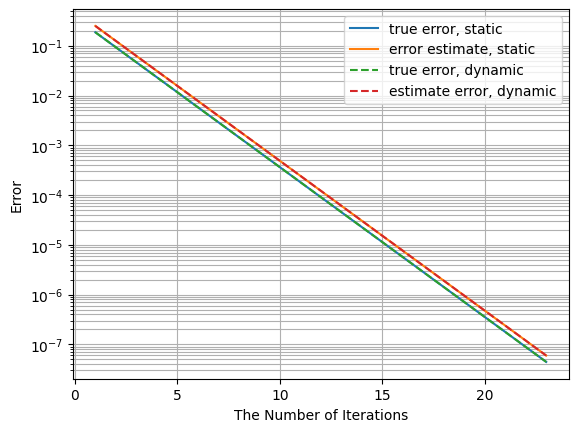

[0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999, 0.4999999999999999,

In [ ]:
## Discussion question C.2 (a)-(b)

# set up the inputs for richardson() and x_star
# set up the optimal value of alpha

# find the root in both static and dynamic cases and plot the error estimates
# and the true errors

def richardson2(A, b, x0, alpha0=None, tol = 10e-8, maxit= 1000):
  '''The richardson2 function applies the Richardson iteration method to solve a linear system of equations.
  It returns the final solution, convergence status, lists of intermediate solutions and error estimates, and a list of calculated alphas.'''
  try:
    xHist = []
    errEst = []
    alphas = []
    iter = 0
    error= 1

    while error > tol and iter < maxit:
      rk = b-np.dot(A, x0)
      alpha = (np.linalg.norm(rk)**2)/(np.sqrt(np.dot(np.matrix.transpose(rk),np.dot(A,rk))))**2
      alphas.append(alpha)
      x = x0 + alpha * rk
      Ba = np.identity(2) - alpha * A
      n = []

      for i in range(len(x)):
        n.append(np.abs(x[i]-x0[i]))
      error_add = np.linalg.norm(n)
      errEst.append(error_add)
      xHist.append(x)
      iter += 1

      if min(errEst) < tol:
        succes = True
      else:
        succes = False
    return x0, succes, xHist, errEst, alphas

  except ZeroDivisionError:
    succes = False
    return succes, xHist, errEst


x0 = np.zeros(2)

xk = richardson(A,b,x0,0.5, tol = 10e-8, maxit=1000)[2]
true_err = []
Error_est =[]
k_err = []

for i in range(1, len(xk)):
  true_add = np.abs(xk[i] - np.array([2/3, 1/3]))
  true_err.append(np.linalg.norm(true_add))
  est = np.linalg.norm(np.abs(xk[i] - xk[i-1]))
  Error_est.append(est)
  k_err.append(i)

plt.semilogy(k_err, true_err, label='true error, static')
plt.semilogy(k_err, Error_est, label='error estimate, static')

xk2 = richardson2(A,b,x0, tol = 10e-8, maxit=1000)[2]

true_err1 = []
err_est1 =[]
k_err1 = []

for i in range(1, len(xk)):
  true_add1 = np.linalg.norm(np.abs(xk[i] - np.array([2/3, 1/3])))
  true_err1.append(true_add1)
  est = np.abs(xk[i] - xk[i-1])
  err_est1.append(np.linalg.norm(est))
  k_err1.append(i)

plt.semilogy(k_err1, true_err1, ls='--', label='true error, dynamic')
plt.semilogy(k_err1, err_est1, ls = '--', label='estimate error, dynamic')
plt.grid(which='both')
plt.xlabel('The Number of Iterations')
plt.ylabel('Error')
plt.legend()
plt.show()

print(richardson2(A,b,x0, tol = 10e-8, maxit=1000)[4])

Matrix C is symmetric and positive definite (SPD)


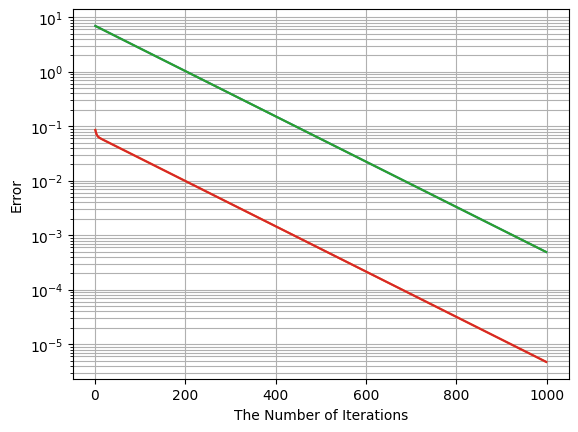

In [ ]:
## Discussion question C.2 (c)-(d)

# repeat the previous exercise modifying the system of equations
C = np.array([[1.1,-1],
              [-1, 1.1]])
C_t = C.transpose()
eigen_C, _ = np.linalg.eig(C)
SPD = np.all(eigen_C > 0)
if np.array_equal(C, C_t) and SPD:
    print('Matrix C is symmetric and positive definite (SPD)')

x0 = np.zeros(2)

xk = richardson(C,b,x0,(42/441), tol = 10e-8, maxit=1000)[2]

true_err = []
err_est =[]
k_errors = []
for i in range(1, len(xk)):
  true_add = np.abs(xk[i] - np.array([5.23809476, 4.76190432]))
  true_err.append(np.linalg.norm(true_add))
  est_add = np.abs(xk[i] - xk[i-1])
  err_est.append(np.linalg.norm(est_add))
  k_errors.append(i)
plt.semilogy(k_errors, true_err)
plt.semilogy(k_errors, err_est)

xk2 = richardson2(C,b,x0, tol = 10e-8, maxit=1000)[2]
true_err2 = []
err_est2 =[]
k_errors2 = []
for i in range(1, len(xk)):
  true_add = np.abs(xk[i] - np.array([5.23809476, 4.76190432]))
  true_err2.append(np.linalg.norm(true_add))
  est_add = np.abs(xk[i] - xk[i-1])
  err_est2.append(np.linalg.norm(est_add))
  k_errors2.append(i)
plt.semilogy(k_errors2, true_err2)
plt.semilogy(k_errors2, err_est2)

plt.xlabel('The Number of Iterations')
plt.ylabel('Error')
plt.grid(which='both')
plt.show()
